In [65]:
# 28 july 2022

## By folding Hamiltonian problems can be solved easily in circular topolgy


## Periodic boxes

In [66]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
import math
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [67]:
delta = 1/20
L = 100.
N = 2000 # No. of lattice points is 2N+1   (L-0 / delta)
x = np.arange(-L,L+delta,delta)
print(len(x))

4001


In [68]:
def kronecker(i,j):
    return 1 if i==j else 0
V0 = -8
def V(z):
  if (int((z)%2) == 0):
    return V0
  else :
    return 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [69]:

H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H[0,2*N] = -1/delta**2
H[2*N,0] = -1/delta**2
print(H)

H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)

H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
# print(H_eigenvalues)
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

[[ 792. -400.    0. ...    0.    0. -400.]
 [-400.  792. -400. ...    0.    0.    0.]
 [   0. -400.  792. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  800. -400.    0.]
 [   0.    0.    0. ... -400.  800. -400.]
 [-400.    0.    0. ...    0. -400.  792.]]


In [70]:
potential = 0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

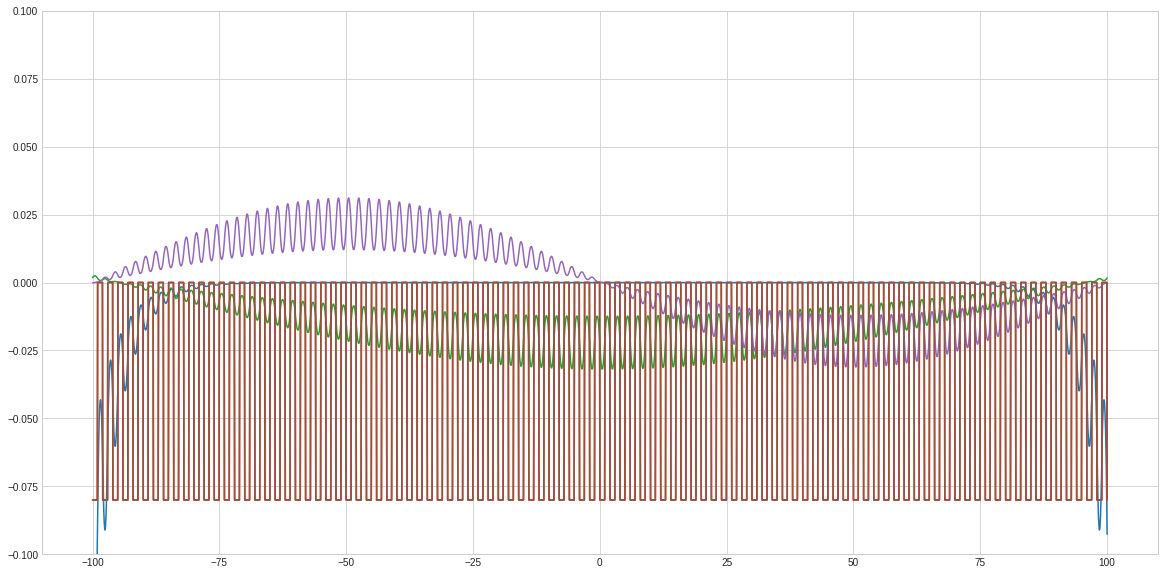

In [106]:
plt.figure(figsize=(20,10))
for i in range(3):
  # plt.figure(figsize=(20,10))
  psi = H_eigenvectors[:,i]
  # plt.figure(figsize=(20,10))
  plt.plot(x,psi,label = 'eigenfunction')
  plt.plot(x,potential,label = 'Potential')
  # plt.legend()
  # plt.xlim(-100,100)
  plt.ylim(-0.1,0.1)
# plt.show()
# plt.plot(x,potential,label = 'Potential')
  
# print(len(psi))

[  -5.23005398   -5.20247174   -5.20201479 ... 1597.2012281  1597.20217513
 1597.20248787]


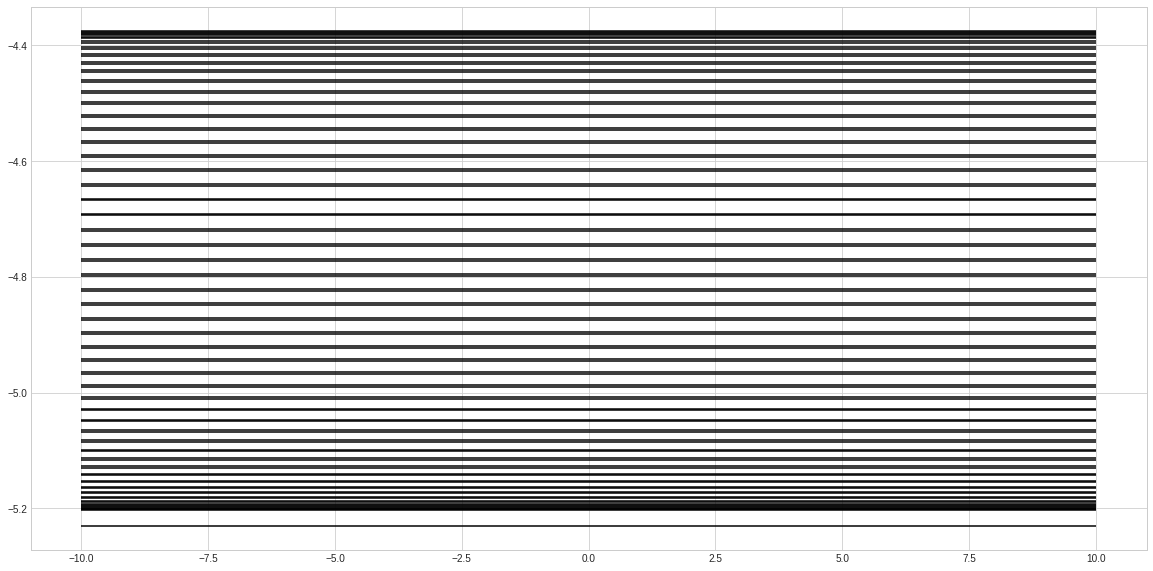

In [104]:
print(H_eigenvalues)
plt.figure(figsize=(20,10))
for i in H_eigenvalues:
  if (i<0):
   plt.hlines(i,-10,10)